# Real vs Satire Data Processing (Sentence Level)

1. Read files by line
2. Lowercase all texts
3. Remove stopwords and punctuations
4. Remove duplicates
5. Lemmatize text

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stops = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
# Uncomment if connecting to Google Drive
# Run this cell and select your UMich Google account in the pop-up

# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
real_path = "data\raw\real_satire\true"
satire_path = "data\raw\real_satire\satire"
true_file_list = ["true_train_1.txt", "true_train_2.txt", "true_train_3.txt", "true_train_4.txt", "true_train_5.txt", "true_train_6.txt"]
satire_file_list = ["satire_train.txt", "satire_dev.txt"]

## Sentence level

In [5]:
def read_text_file(file_path, file_list):
    """ 
    Read text file and return the content as a string
    
    Parameters
    ----------
    file_path: str"""
    text_list = []
    for file in file_list:
        with open(file_path + file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                text_list.append([line.strip()])

    return text_list[:-1]

In [6]:
real_train_list = read_text_file(real_path, true_file_list)
satire_train_list = read_text_file(satire_path, satire_file_list)

In [7]:
print(len(real_train_list))
print(len(satire_train_list))

2164515
162557


Since the data is imbalanced (real:satire = 13:1) at sentence level, we will cut real_train_list length off and make the ratio of length of real and satire is 2:1.

In [8]:
real_train_list = real_train_list[:325114]
len(real_train_list)

325114

In [9]:
def remove_proper_noun(list, tag_list):
    """ 
    Remove proper nouns from the list
    
    Parameters
    ----------
    list: list
    tag_list: list
    """
    edited_list = []
    print("Removing proper noun...")
    for item in list:
        test = '@@'.join(item)
        tagged_list = nltk.pos_tag(word_tokenize(test))
        edited_list.append(' '.join([word for word, tag in tagged_list if tag != tag_list[0] and tag != tag_list[1]]))
    print("Proper nouns removed.")
    return edited_list

In [10]:
real_edited_list = remove_proper_noun(real_train_list, ['NNP', 'NNPS'])
satire_edited_list = remove_proper_noun(satire_train_list, ['NNP', 'NNPS'])

Removing proper noun...
Proper nouns removed.
Removing proper noun...
Proper nouns removed.


In [11]:
def lower_string(string_list):
    """ 
    Lower all the strings in the list
    
    Parameters
    ----------
    string_list: list of strings
    """
    for num in range(len(string_list)):
        string_list[num] = ''.join(string_list[num]).lower()
    # remove duplicates
    clean_string_list = list(set(string_list))
    return clean_string_list

In [12]:
# losercase all strings
lower_real_train = lower_string(real_edited_list)
lower_satire_train = lower_string(satire_edited_list)

In [13]:
print(len(lower_real_train))
print(len(lower_satire_train))

304805
147193


In [14]:
def remove_stopword(string_list):
    """ 
    Remove all the stopwords in the list
    
    Parameters
    ----------
    string_list: list of strings
    """
    for num in range(len(string_list)):
        string_list[num] = ' '.join([word for word in string_list[num].split() if word not in (stops)])
        string_list[num] = string_list[num].replace("\'", "")
    return string_list

In [15]:
clean_real_list = remove_stopword(lower_real_train)
clean_satire_list = remove_stopword(lower_satire_train)

In [16]:
print(len(clean_real_list))
print(len(clean_satire_list))

304805
147193


## Word level

In [17]:
def tokenize_string(string_list):
    """ 
    Tokenize all the strings in the list
    
    Parameters
    ----------
    string_list: list of strings
    """
    tokenizer = RegexpTokenizer(r'\w+')
    ans_list = []
    for num in range(len(string_list)):
        ans_list.append(tokenizer.tokenize(string_list[num]))
    return ans_list

In [18]:
tokenized_real = tokenize_string(clean_real_list)
tokenized_satire = tokenize_string(clean_satire_list)

In [19]:
def stem_lemma(string_string, stem=False, lemma=False):
    """ 
    Stem or lemmatize all the strings in the list
    
    Parameters
    ----------
    string_list: list of strings
    stem: boolean
    lemma: boolean
    """
    ans_list = []
    if stem:
        porter = PorterStemmer()
        for num in range(len(string_string)):
            ans_list.append([porter.stem(word) for word in string_string[num]])

    if lemma:
        lemmatizer = WordNetLemmatizer()
        for num in range(len(string_string)):
            ans_list.append([lemmatizer.lemmatize(word) for word in string_string[num]])
    return ans_list

In [20]:
real_lemma = stem_lemma(tokenized_real, lemma=True)
len(real_lemma)

304805

In [21]:
satire_lemma = stem_lemma(tokenized_satire, lemma=True)
len(satire_lemma)

147193

In [22]:
def most_common_tags_plot(tokenize_list, num, real=True):
    """
    Plot the most common tags

    Parameters
    ----------
    tokenize_list: list of lists of tokenized strings
    num: int
    real: boolean
    """
    all_strings = [inner for outer in tokenize_list for inner in outer]
    tag_list = nltk.pos_tag(all_strings)
    tag_common = nltk.FreqDist(tag for (word, tag) in tag_list).most_common(num)
    x = []
    y = []
    for tag, count in tag_common:
        x.append(tag)
        y.append(count)
    plt.figure(figsize=(10, 5))
    if real:
        plt.title("Most Common Tags for Real Articles")
        color="#4DAF4A"
    else:
        plt.title("Most Common Tags for Satire Articles")
        color="#377EB8"
    plt.xlabel("Tags")
    plt.ylabel("Count")
    return plt.bar(x, y, color=color)


<BarContainer object of 10 artists>

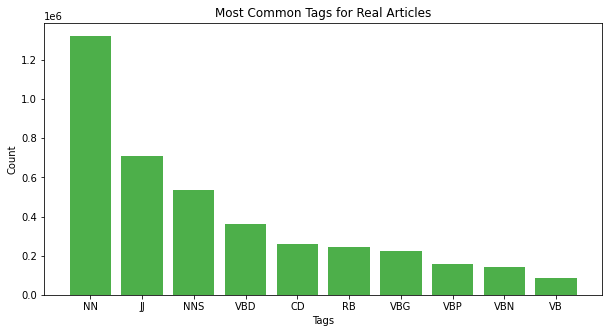

In [23]:
most_common_tags_plot(tokenized_real, 10, real=True)

<BarContainer object of 10 artists>

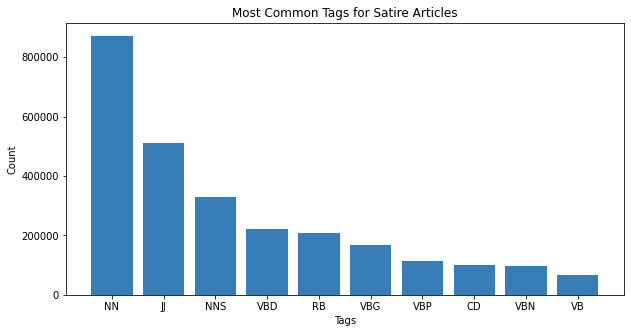

In [24]:
most_common_tags_plot(tokenized_satire, 10, real=False)

There are more cardinal digit (CD) in real articles than satirical articles.

In [27]:
def most_common_words_plot(string_list, num, real=True):
    """ 
    Plot the most common words in the list
    
    Parameters
    ----------
    string_list: list of strings
    num: int
    """
    all_strings = [inner for outer in string_list for inner in outer]
    counter = Counter(all_strings)
    most_common = counter.most_common(num)
    word_list, count_list = [], []
    for word, count in most_common:
        word_list.append(word)
        count_list.append(count)
    if real:
      title="Most Common Words in Real Articles"
      color="#4DAF4A"
    else:
      title="Most Common Words in Satire Articles"
      color="#1F77B4"
    sns.barplot(x=count_list,y=word_list, color=color).set_title(title)

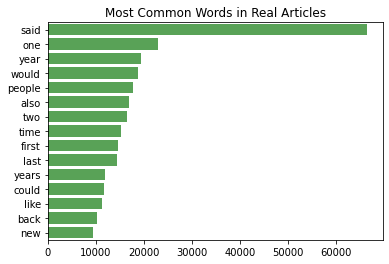

In [28]:
most_common_words_plot(tokenized_real, 15, real=True)

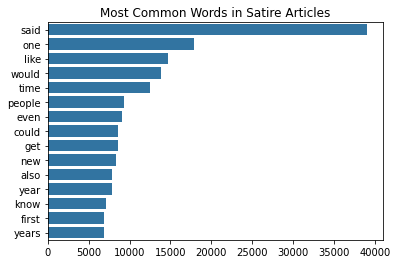

In [29]:
most_common_words_plot(tokenized_satire, 15, real=False)

## N-GRAM level

In [30]:
def n_grams(string_list, n):
    """
    Return the n-grams of the list

    Parameters
    ----------
    string_list: list of strings
    n: int
    """
    
    n = n
    ngrams = {}
    for item in range(len(string_list)):
        for num in range(len(string_list[item]) - n):
            seq = ' '.join(string_list[item][num:num+n])
            if seq not in ngrams.keys():
                ngrams[seq] = []
            ngrams[seq].append(string_list[item][num + n])
    return ngrams

In [31]:
real_bigrams = n_grams(real_lemma, 2)
satire_bigrams = n_grams(satire_lemma, 2)

In [32]:
real_trigrams = n_grams(real_lemma, 3)
satire_trigrams = n_grams(satire_lemma, 3)

In [33]:
def ngrams_count(ngrams_dict):
    """
    Return the count of the n-grams

    Parameters
    ----------
    ngrams_dict: dict
    """
    ngrams_count = {}
    for a_key in ngrams_dict.keys():
        ngrams_dict[a_key] = Counter(ngrams_dict[a_key])
        ngrams_count[a_key] = sum(ngrams_dict[a_key].values())
    return ngrams_count

In [34]:
real_bigrams_count = ngrams_count(real_bigrams)
satire_bigrams_count = ngrams_count(satire_bigrams)
real_trigrams_count = ngrams_count(real_trigrams)
satire_trigrams_count = ngrams_count(satire_trigrams)

In [35]:
def ngrams_most_common_plot(ngrams_count, num, title, real=True):
    """
    Plot the most common n-grams

    Parameters
    ----------
    ngrams_count: dict
    num: int
    """
    word_list, count_list = [], []
    for word, count in sorted(ngrams_count.items(), key=lambda x: x[1], reverse=True)[:num]:
        word_list.append(word)
        count_list.append(count)
    if real:
      color = "#4DAF4A"
    else:
      color = "#1F77B4"
    return sns.barplot(x=count_list, y=word_list, color=color).set(title=title)

[Text(0.5, 1.0, 'Most common bigrams in real news')]

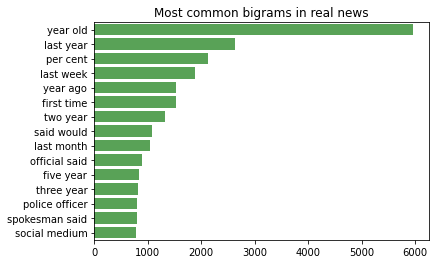

In [36]:
ngrams_most_common_plot(real_bigrams_count, 15, "Most common bigrams in real news", real=True)

[Text(0.5, 1.0, 'Most common bigrams in satire news')]

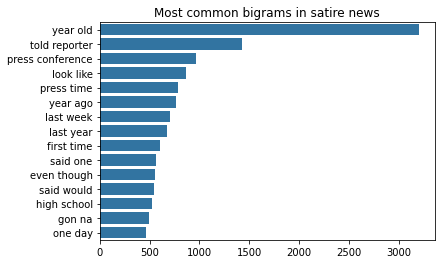

In [37]:
ngrams_most_common_plot(satire_bigrams_count, 15, "Most common bigrams in satire news", real=False)

[Text(0.5, 1.0, 'Most common trigrams in real news')]

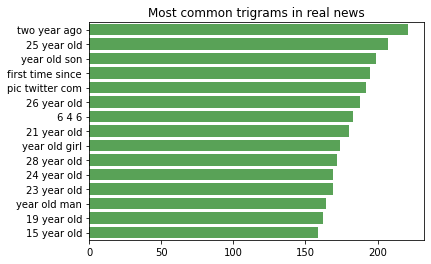

In [38]:
ngrams_most_common_plot(real_trigrams_count, 15, "Most common trigrams in real news", real=True)

[Text(0.5, 1.0, 'Most common trigrams in satire news')]

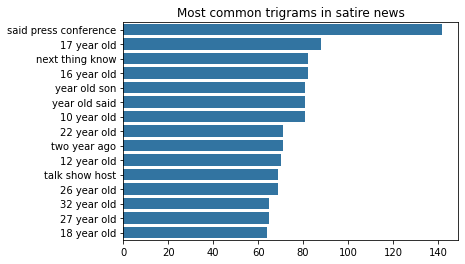

In [39]:
ngrams_most_common_plot(satire_trigrams_count, 15, "Most common trigrams in satire news", real=False)